In [2]:
import math
import matplotlib.pyplot as pyplot
import numpy as np

In [3]:
def camber_line( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    m * (x / np.power(p,2)) * (2.0 * p - (x / c)),
                    m * ((c - x) / np.power(1-p,2)) * (1.0 + (x / c) - 2.0 * p ))

In [4]:
def dyc_over_dx( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    ((2.0 * m) / np.power(p,2)) * (p - x / c),
                    ((2.0 * m ) / np.power(1-p,2)) * (p - x / c ))

In [5]:
def thickness( x, t, c ):
    term1 =  0.2969 * (np.sqrt(x/c))
    term2 = -0.1260 * (x/c)
    term3 = -0.3516 * np.power(x/c,2)
    term4 =  0.2843 * np.power(x/c,3)
    term5 = -0.1015 * np.power(x/c,4)
    return 5 * t * c * (term1 + term2 + term3 + term4 + term5)

In [6]:
def naca4(x, m, p, t, c=1):
    dyc_dx = dyc_over_dx(x, m, p, c)
    th = np.arctan(dyc_dx)
    yt = thickness(x, t, c)
    yc = camber_line(x, m, p, c)  
    return ((x - yt*np.sin(th), yc + yt*np.cos(th)), 
            (x + yt*np.sin(th), yc - yt*np.cos(th)))

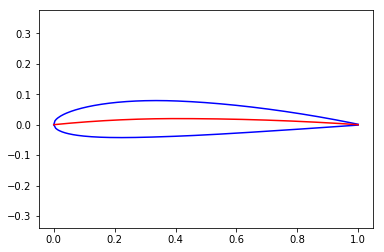

[array([ 0.        ,  0.00502513,  0.01005025,  0.01507538,  0.0201005 ,
        0.02512563,  0.03015075,  0.03517588,  0.04020101,  0.04522613,
        0.05025126,  0.05527638,  0.06030151,  0.06532663,  0.07035176,
        0.07537688,  0.08040201,  0.08542714,  0.09045226,  0.09547739,
        0.10050251,  0.10552764,  0.11055276,  0.11557789,  0.12060302,
        0.12562814,  0.13065327,  0.13567839,  0.14070352,  0.14572864,
        0.15075377,  0.15577889,  0.16080402,  0.16582915,  0.17085427,
        0.1758794 ,  0.18090452,  0.18592965,  0.19095477,  0.1959799 ,
        0.20100503,  0.20603015,  0.21105528,  0.2160804 ,  0.22110553,
        0.22613065,  0.23115578,  0.2361809 ,  0.24120603,  0.24623116,
        0.25125628,  0.25628141,  0.26130653,  0.26633166,  0.27135678,
        0.27638191,  0.28140704,  0.28643216,  0.29145729,  0.29648241,
        0.30150754,  0.30653266,  0.31155779,  0.31658291,  0.32160804,
        0.32663317,  0.33165829,  0.33668342,  0.34170854,  0.3

In [7]:
#naca2412 
m = 0.02
p = 0.4
t = 0.12
c = 1.0

x = np.linspace(0,1,200)
for item in naca4(x, m, p, t, c):
    pyplot.plot(item[0], item[1], 'b')
pyplot.plot(x, camber_line(x, m, p, c), 'r')
pyplot.axis('equal')
pyplot.xlim((-0.05, 1.05))
# figure.set_size_inches(16,16,forward=True)
pyplot.show()

itemlist = list(item)
y_abovelist, y_belowlist = map(list, zip(itemlist))
y_abovearray = np.squeeze(np.asarray(y_abovelist))
y_belowarray = np.squeeze(np.asarray(y_belowlist))
x_list = list(x)

list_of_lists = list([x, y_abovearray, y_belowarray])

#for a in zip(*list_of_lists):
#    print(*a)
print(list_of_lists)